# Load the dataset

In [1]:
from pandas import read_csv
import numpy as np
url = 'BankNote_Authentication.csv'
df = read_csv(url, header=None)
print(df. shape)

(1372, 5)


In [2]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# MLP

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
X,y =  df.values[:,:-1],df.values[:,-1]

In [5]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["acc"])
#save weights
checkpoint_filepath = 'checkpoints/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[model_checkpoint_callback])


Epoch 1/50
29/29 [==============================] - 0s 6ms/step - loss: 1.6661 - acc: 0.5637 - val_loss: 1.4280 - val_acc: 0.5894
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 1.2819 - acc: 0.6213 - val_loss: 1.1281 - val_acc: 0.6689
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 1.0565 - acc: 0.6790 - val_loss: 0.9480 - val_acc: 0.6909
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.9003 - acc: 0.6964 - val_loss: 0.8027 - val_acc: 0.7086
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.7596 - acc: 0.7138 - val_loss: 0.6650 - val_acc: 0.7285
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6214 - acc: 0.7421 - val_loss: 0.5411 - val_acc: 0.7395
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4962 - acc: 0.7780 - val_loss: 0.4254 - val_acc: 0.7748
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 0.3835 - acc: 0.80

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [7]:
print("Train Accuracy", history.history['val_acc'][-1])
# predict test set
yhat = model.predict_classes(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Test Accuracy: %.3f' % score)
#F1 score
from sklearn.metrics import f1_score
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Train Accuracy 1.0
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Test Accuracy: 1.000
F1 score: 1.000000


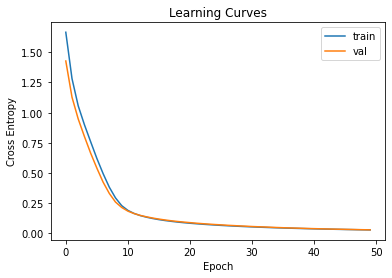

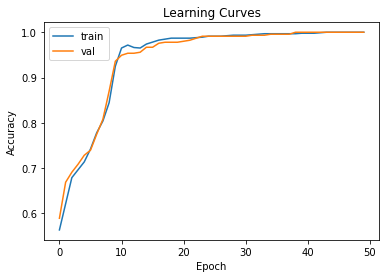

In [8]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='val')
pyplot.legend()
pyplot.show()

In [9]:
weights = model.get_weights()

In [10]:
weights

[array([[ 0.4243708 , -0.07226972,  0.7401747 ,  0.7010456 ,  0.4075161 ,
         -0.3556914 ,  1.3668437 ,  0.00876872, -1.74228   ,  0.16608842],
        [ 0.66713506,  0.2303877 ,  0.187049  ,  0.98262465,  0.74803895,
          0.34466445, -0.129467  ,  0.5851627 , -0.19164257, -0.2838895 ],
        [ 0.4209835 ,  0.65100193,  0.42979676,  0.63166016,  0.53190076,
         -0.11104871,  0.34235635, -1.1324401 ,  0.28437415, -0.24576873],
        [-0.37600335,  0.3245657 ,  0.03550036,  0.37446502,  0.11753521,
         -0.1971326 , -1.4951881 , -1.3061543 ,  0.45342407, -0.00664823]],
       dtype=float32),
 array([-0.19431579, -0.25546625, -0.04980365, -0.11937315, -0.28700057,
        -0.42897546, -0.14917682,  0.32406396,  0.7947631 , -0.3743281 ],
       dtype=float32),
 array([[-0.81250983],
        [-0.4542985 ],
        [-0.9378083 ],
        [-0.44268972],
        [-0.14199917],
        [-0.5209734 ],
        [-0.2977233 ],
        [ 0.57709324],
        [ 0.7861046 ],
   